## Load Imports

In [1]:
# python imports
from math import pi
import json
import os

# third-party imports
import pandas as pd
import numpy as np

from sklearn import preprocessing

import matplotlib.pyplot as plt

## Load results

In [2]:
cvss_stats = pd.DataFrame()
frape_stats = pd.DataFrame()

feature_importances = pd.Series(dtype='float64')
feature_importances_std = pd.Series(dtype='float64')

occurrences = 0

for file in os.listdir('../output/'):
    if file.endswith('.json'):
        with open(f'../output/{file}') as f:
            
            occurrences += 1
            
            json_file = json.load(f)
            
            iterations = json_file['iterations']
            features = pd.Series(json_file['feature_importances'])
            features_std = pd.Series(json_file['feature_importances_std'])
        
            cvss = pd.DataFrame.from_records(iterations['cvss_stats'])
            frape = pd.DataFrame.from_records(iterations['frape_stats'])
                       
            if not cvss_stats.empty:
                cvss_stats += cvss
                frape_stats += frape
            else:
                cvss_stats = cvss
                frape_stats = frape
                
            if not feature_importances.empty:
                feature_importances += features
                feature_importances_std += features_std
            else:
                feature_importances = features
                feature_importances_std = features_std

In [3]:
cvss_stats /= occurrences
frape_stats /= occurrences
feature_importances /= occurrences
feature_importances_std /= occurrences

## Utils

In [4]:
def normalize_min_max_values(df):
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(df.values)
    return pd.DataFrame(x_scaled, columns=df.columns)

In [5]:
def normalize_values(df):
    return df.apply(lambda x: x / x.max())

In [6]:
def print_graph(cvss_stats, frape_stats, key):
    
    # https://www.pythoncharts.com/matplotlib/radar-charts/
    
    cvss = cvss_stats.iloc[[key]]
    cvss = np.squeeze(cvss.values).tolist()
    
    frape = frape_stats.iloc[[key]]
    frape = np.squeeze(frape.values).tolist()
        
    labels = cvss_stats.columns.tolist()
    labels = [label.replace('_', ' ').capitalize() for label in labels]
        
    angles = np.linspace(start=0, stop=2 * np.pi, num=len(labels), endpoint=False).tolist()
    
    cvss += cvss[:1]
    frape += frape[:1]
    labels += labels[:1]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))

    ax.plot(angles, cvss, color='#3E6D9C', linewidth=1, label='CVSS')
    ax.fill(angles, cvss, color='#3E6D9C', alpha=0.25)
    
    ax.plot(angles, frape, color='#FD841F', linewidth=1, label='FRAPE')
    ax.fill(angles, frape, color='#FD841F', alpha=0.25)
    
    # Fix axis to go in the right order and start at 12 o'clock.
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Draw axis lines for each angle and label.
    ax.set_thetagrids(np.degrees(angles), labels)

    # Go through labels and adjust alignment based on where
    # it is in the circle.
    for label, angle in zip(ax.get_xticklabels(), angles):
        if angle in (0, np.pi):
            label.set_horizontalalignment('center')
        elif 0 < angle < np.pi:
            label.set_horizontalalignment('left')
        else:
            label.set_horizontalalignment('right')

    # Ensure radar goes from 0 to 100.
    ax.set_ylim(0, 1)
    # You can also set gridlines manually like this:
    # ax.set_rgrids([20, 40, 60, 80, 100])

    # Set position of y-labels (0-100) to be in the middle
    # of the first two axes.
    ax.set_rlabel_position(180 / len(labels))

    # Add some custom styling.
    # Change the color of the tick labels.
    ax.tick_params(colors='#222222')
    # Make the y-axis (0-100) labels smaller.
    ax.tick_params(axis='y', labelsize=8)
    # Change the color of the circular gridlines.
    ax.grid(color='#AAAAAA')
    # Change the color of the outermost gridline (the spine).
    ax.spines['polar'].set_color('#222222')
    # Change the background color inside the circle itself.
    ax.set_facecolor('#FAFAFA')
    
    # Add title.
    ax.set_title('Comparing Fixing Vulnerabilities Strategy', y=1.08)

    # Add a legend as well.
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

## Running

In [7]:
cvss_stats = normalize_values(cvss_stats)
frape_stats = normalize_values(frape_stats)

# cvss_stats = normalize_min_max_values(cvss_stats)
# frape_stats = normalize_min_max_values(frape_stats)

In [8]:
feature_importances = feature_importances[cvss_stats.columns]

feature_importances.drop(labels=['exploit_published_date', 'cve_published_date', 'attack_type_none'], inplace=True)

feature_importances = feature_importances.sort_values(ascending=False).head(10)
feature_importance_names = feature_importances.index.tolist()

std_values = feature_importances_std[feature_importance_names].values

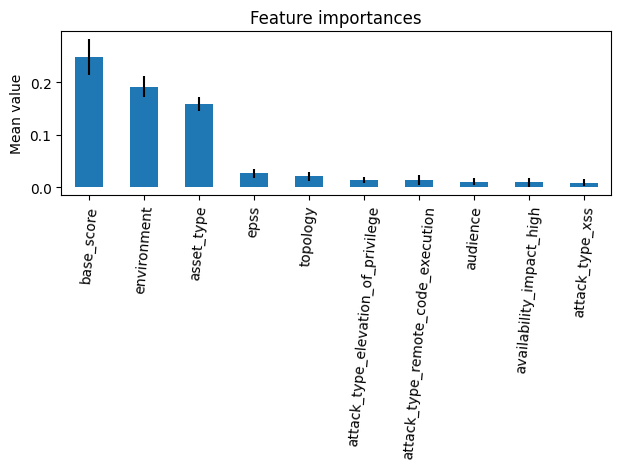

In [9]:
fig, ax = plt.subplots()

feature_importances.plot.bar(yerr=std_values, ax=ax)

ax.set_title("Feature importances")
ax.set_ylabel("Mean value")

ax.set_xticklabels(feature_importance_names, rotation=85)

fig.tight_layout()

In [10]:
cvss_stats = cvss_stats[feature_importance_names]
frape_stats = frape_stats[feature_importance_names]

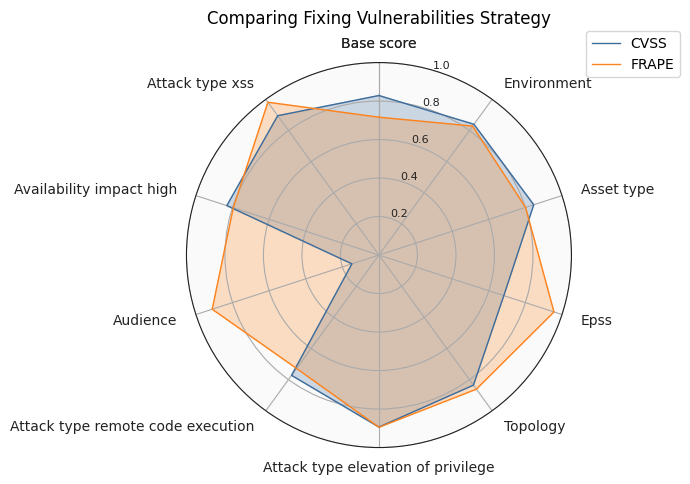

In [11]:
print_graph(cvss_stats, frape_stats, '1')

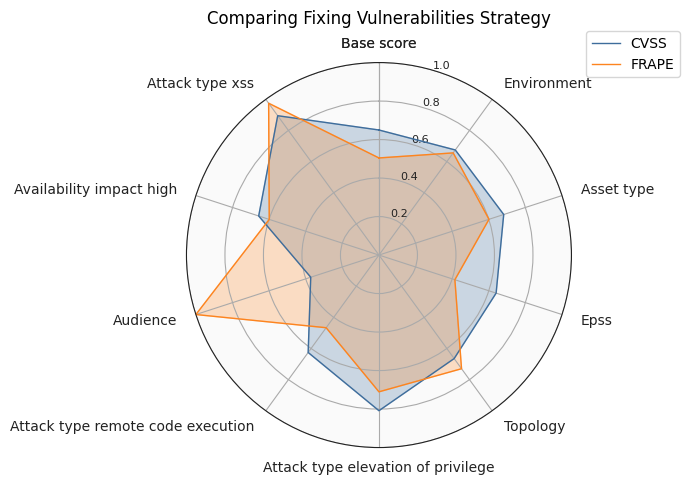

In [12]:
print_graph(cvss_stats, frape_stats, '2')

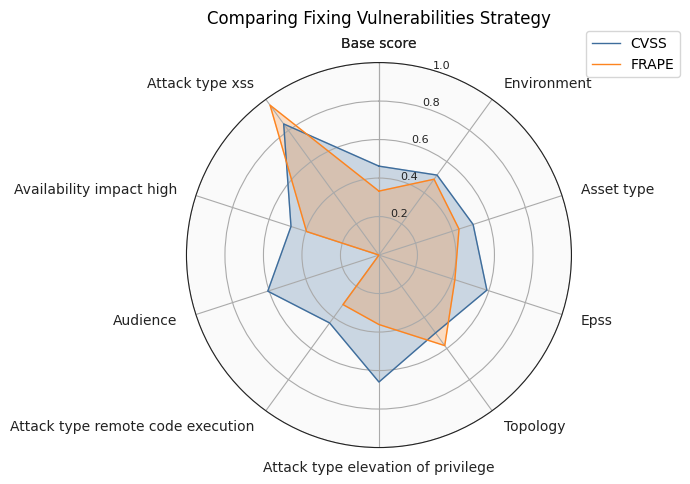

In [13]:
print_graph(cvss_stats, frape_stats, '3')

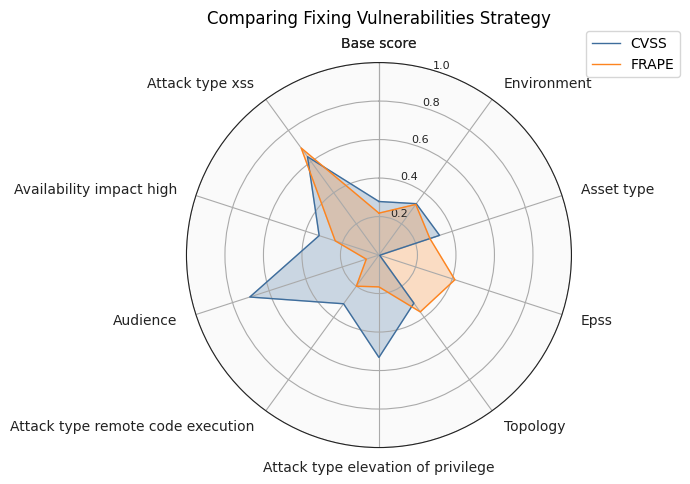

In [14]:
print_graph(cvss_stats, frape_stats, '4')

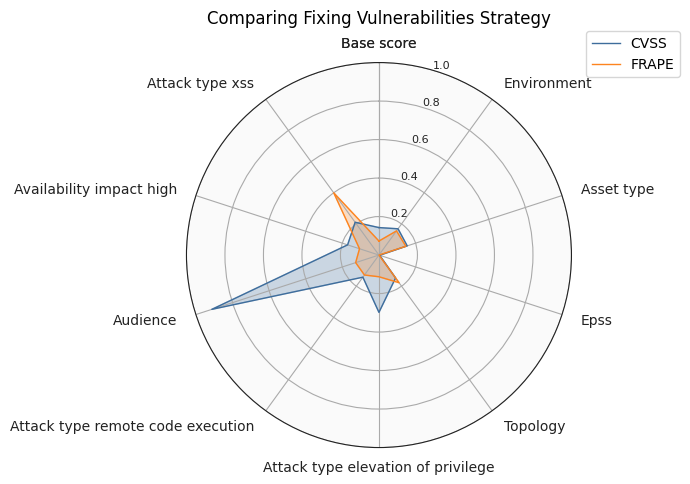

In [15]:
print_graph(cvss_stats, frape_stats, '5')

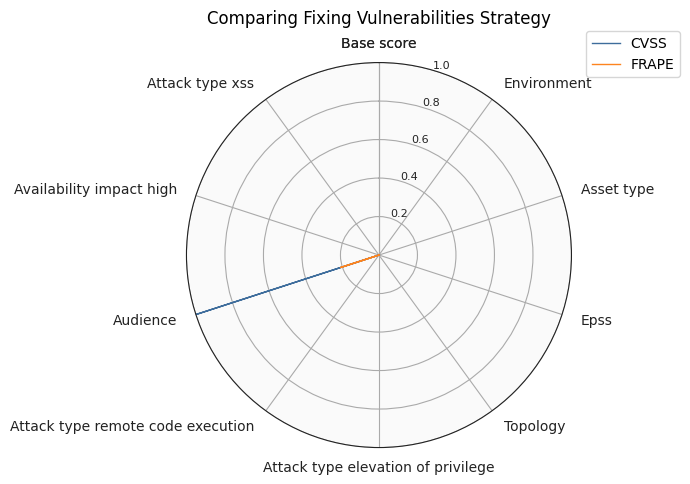

In [16]:
print_graph(cvss_stats, frape_stats, '6')